In [1]:
%matplotlib inline
from pylab import *
rcParams['font.size']=16
rcParams['legend.fontsize']=12

'''
Load EXOCAT
'''
import pandas
exocat = pandas.read_excel('ExoCat1.xls', header=0)


# Use the HID to initialize
#star_HID_list = [32349, 16537, 108870, 8102, 19849, 97649, 96100, 15510]
#star_HID_list = [16537, 96100]
#HID = 32349 # Sirius A
#HID = 16537 # Epsilon Eridani
#HID = 108870 # Epsilon Indi A
#HID = 8102  # Tau Ceti
#HID = 19849 # omicron 2 Eridani
#HID = 97649 # Altair
#HID = 96100 # Sigma Draconis
#HID = 15510 # 82 Eridani
#i_entry = np.where(exocat['HIP'] == HID)[0][0]
#exocat_star =  exocat.ix[i_entry]

star_HID_list = [
        #16537, #epsilon Eridani, dropped due to high zodi
        8102,   #tau Ceti
        37279,  #Procyon A
        108870, #epsilon Indi A
        32349,  #Sirius A
        19849,  #omicron 2 Eridani
        97649,  #Altair
        99240,  #delta Pavonis
        15510,  #82 Eridani
        96100,  #sigma Draconis
        2021,   #beta Hyi
        61317,  #beta CVn
        22449,  #1 Ori
        #91262, #Vega, dropped due to high zodi
        #86974, #Mu Herculis, dropped to binary companion contamination
        113368, #Fomalhaut
        17378,  #Delta Eridani
        27072,  #Gamma Leporis
        1599,   #Zeta Tucanae
        ]

from Star import Star

#print 'Lbol  %1.3f'%exocat_star['Lbol']
#print 'd(pc) %1.3f'% exocat_star['d(pc)']
#print 'Teff  %1.0f'%exocat_star['Teff']
#star_model = Star(L_bol = exocat_star['Lbol'], d_pc = exocat_star['d(pc)'], Temperature=exocat_star['Teff'], Mass = exocat_star['M*(Msun)'], MV = exocat_star['Mv'])

from Zodi import Zodi
zodi_model = Zodi()

from Observatory_Position_and_Time import Observatory_Position_and_Time
#obs_PT = Observatory_Position_and_Time(exocat_star['RA(ICRS)'], exocat_star['DE(ICRS)'])

from Exozodi import Exozodi
exozodi_model = Exozodi()

from Detector import Detector
#detector_model = Detector(Diameter=2.4, throughput=0.2, quantum_efficiency=0.9, contrast=1.e-10, band=[wl_1, wl_2], PSF_diameter_mas = 65.)

from Completeness import Completeness_MC_Calculator
CMC_calc = Completeness_MC_Calculator()


In [2]:
# loop through stars

# SET COMBINATIONS OF PARAMETERS HERE

parms = []

# Earths
# Cold 
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 6371. , 0.2, 1.77, 10., 0.10, 1.e-12, 0.0
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])
# Warm 
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 6371. , 0.2, 0.75, 1.77, 0.16, 4.e-11, 4.5
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])
# Hot 
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 6371. , 0.2, 0.01, 0.75, 0.10, 4.e-11, 4.5
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])

#Super-Earths
# Cold 
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 1.4*6371. , 0.2, 1.77, 10., 0.10, 1.e-12, 0.0
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])
# Warm
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 1.4*6371. , 0.2, 0.75, 1.77, 0.10, 4.e-11, 4.5
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])
# Hot 
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 1.4*6371. , 0.2, 0.01, 0.75, 0.10, 4.e-11, 4.5
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])

#Sub-Neptunes
# Cold 
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 2.0*6371. , 0.4, 1.77, 10., 0.10, 1.e-12, 0.0
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])
# Warm
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 2.0*6371. , 0.5, 0.75, 1.77, 0.10, 4.e-11, 4.5
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])
# Hot 
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 2.0*6371. , 0.2, 0.01, 0.75, 0.10, 4.e-11, 4.5
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])

#Neptunes
# Cold 
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 3.9*6371. , 0.4, 1.77, 10., 0.10, 1.e-12, 0.0
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])
# Warm
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 3.9*6371. , 0.5, 0.75, 1.77, 0.10, 4.e-11, 4.5
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])
# Hot 
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 3.9*6371. , 0.2, 0.01, 0.75, 0.10, 4.e-11, 4.5
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])

#Jupiters
# Cold 
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 11.*6371. , 0.5, 1.77, 10., 0.10, 1.e-12, 0.0
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])
# Warm
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 11.*6371. , 0.5, 0.75, 1.77, 0.10, 4.e-11, 4.5
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])
# Hot 
p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = 11.*6371. , 0.2, 0.01, 0.75, 0.10, 4.e-11, 4.5
parms.append([p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod])

#print 'Pl. Rad. R_E; geom albedo; inner orbit radius, outer orbit radius'
#print p_rad/6371., g_alb, orb_inner, orb_outer
#print '-----------------------------------------------------------------\n'

parms = np.array(parms)
results = []
labels = []
verbose = False
cc = -1
for parm in parms:
    cc+=1
    temperature = ''
    planet_type = ''
    if cc%3==0: temperature = 'cold'
    if cc%3==1: temperature = 'warm'
    if cc%3==2: temperature = 'hot'
    if cc<3: planet_type = 'Earth'
    if cc>=3 and cc<6: planet_type = 'Super-Earth'
    if cc>=6 and cc<9: planet_type = 'SubNeptune'
    if cc>=9 and cc<12: planet_type = 'Neputune'
    if cc>=12 and cc<15: planet_type = 'Jupiter'
        
    labels.append(temperature + ' ' + planet_type)
    
    print(labels[cc])

    p_rad, g_alb, orb_inner, orb_outer, occ_rate, inst_C, nzod = parm
    T_int_array = np.ones(1)*1.*24.*60.*60. # one day only
    #T_int_array = 10**np.arange(-3,2.1,0.2)*24.*60.*60.
    #T_int_array = np.arange(0.,10.,0.2)*24.*60.*60.
    #nzod_list = [1., 4., 10., 15.]
    nzod_list = [nzod] # assume 4.5 for hot and warm planets, 0. for cold planets
    #spect_SNR=5.
    multi_C_array = []
    C_array = []
    for HID in star_HID_list:
        i_entry = np.where(exocat['HIP'] == HID)[0][0]
        exocat_star =  exocat.iloc[i_entry]
        if verbose: print('\n---------------------------------')
        if verbose: print(exocat_star['COMMON'])
        star_model = Star(L_bol = exocat_star['Lbol'], d_pc = exocat_star['d(pc)'], Temperature=exocat_star['Teff'], Mass = exocat_star['M*(Msun)'], MV = exocat_star['Mv'])

        obs_PT = Observatory_Position_and_Time(exocat_star['RA(ICRS)'], exocat_star['DE(ICRS)'])

        #figure(figsize=(7,6))
        #ax = subplot(111)

        for zz in range(0,len(nzod_list)):
            wl_1 = 615.e-9
            wl_2 = 800.e-9
            # e2e efficiency is 0.025 (requirements) or 0.039 (CBE)
            detector_model = Detector(Diameter=2.4, 
                                      throughput=0.039, 
                                      quantum_efficiency=1.0, 
                                      #contrast=4.e-11, # CBE 
                                      contrast=1.e-12, # optimistic contrast 
                                      band=[wl_1, wl_2], PSF_diameter_mas = 65.)
            for T_int in T_int_array:
                C = CMC_calc.Completeness(
                        star_model,
                        detector_model,
                        zodi_model,
                        exozodi_model,
                        obs_PT, 
                        n_zodi=nzod_list[zz],
                        reference_inner_orbital_radius_AU = orb_inner, 
                        reference_outer_orbital_radius_AU = orb_outer, 
                        planet_radius_km = p_rad, 
                        geometric_albedo = g_alb,
                        T_int            = T_int, # seconds
                        t_obs_days       = np.array([0., 135., 370., 500.]),
                        IWA_lim_mas      = 100.,
                        SNR_cut          = 5.,
                        num_samples      = 10000,
                        scale_radius = True, 
                        diagnostic_plots = False)
                C_array.append(C)
                #print 'CMC_calc.SNR.shape', CMC_calc.SNR.shape
                if verbose: print('CMC_calc.shape', CMC_calc.cut.shape)
                if verbose: print('float(np.sum(CMC_calc.cut[0,:])), (len(CMC_calc.cut[0,:]))', float(np.sum(CMC_calc.cut[0,:])), (len(CMC_calc.cut[0,:])))
                # NOTE: the values are binary so the sum of one or more true value is true (e.g., it is not overcounting, it is 1 or 0)
                if verbose: print('float(np.sum(CMC_calc.cut[0,:] + CMC_calc.cut[1,:] + CMC_calc.cut[2,:] + CMC_calc.cut[3,:])), (len(CMC_calc.cut[0,:]))', 
                                  float(np.sum(CMC_calc.cut[0,:] + CMC_calc.cut[1,:] + CMC_calc.cut[2,:] + CMC_calc.cut[3,:])), 
                                  (len(CMC_calc.cut[0,:])))
                multi_C = float(np.sum(CMC_calc.cut[0,:] + CMC_calc.cut[1,:] + CMC_calc.cut[2,:] + CMC_calc.cut[3,:]))/float(len(CMC_calc.cut[0,:]))
                if verbose: print('CMC_calc.cut[:, 0]', CMC_calc.cut[:, 0])
                multi_C_array.append(multi_C)
                if verbose: print('Completeness: C, multi_C', C, multi_C)
                if verbose: print('%s\t%1.3f'%(exocat_star['COMMON'][0:15], C_array[-1]))
            #plot(T_int_array/(24.*60.*60.), C_array, 'k-', lw=2, label='Det., SNR>5')
            '''
            wl_1 = 725.e-9 - 14.35e-9/2.
            wl_2 = 725.e-9 + 14.35e-9/2.
            detector_model = Detector(Diameter=2.4, throughput=0.2, quantum_efficiency=0.9, contrast=1.e-10, band=[wl_1, wl_2], PSF_diameter_mas = 65.)
            lt=['k--', 'k-.', 'k:']
            cc=0
            for spect_SNR in [5., 10. ,20.]:
                C_sp_array = []
                for T_int in T_int_array:
                    C = CMC_calc.Completeness(
                            star_model,
                            detector_model,
                            zodi_model,
                            exozodi_model,
                            obs_PT, 
                            n_zodi=nzod_list[zz],
                            reference_inner_orbital_radius_AU = 0.75, 
                            reference_outer_orbital_radius_AU = 1.77, 
                            planet_radius_km = 6371., 
                            geometric_albedo = 0.2,
                            T_int            = T_int, # seconds
                            t_obs_days       = np.array([0.]),
                            IWA_lim_mas      = 100.,
                            SNR_cut          = spect_SNR,
                            num_samples      = 10000,
                            scale_radius = True, 
                            diagnostic_plots = False)
                    C_sp_array.append(C)
                    #print C

                semilogx(T_int_array/(24.*60.*60.), C_sp_array, lt[cc], lw=cc+3, label='Spect., SNR>%1.0f'%spect_SNR)
                cc+=1
        grid(True, which='both', color='gray')
        xlabel('Integration Time, days')
        ylabel('HZ Exo-Earth Completeness')
        yticks(np.arange(0.,1.05, 0.1))
        #xticks(np.arange(0.,14.05,1.))
        title(exocat_star['COMMON']+ ', %1.0f zodi'%nzod_list[-1])
        legend(loc=2, fontsize=14)
        xlim(1.e-3,30.)
        '''
            
    results.append([np.sum(C_array)*occ_rate, np.sum(multi_C_array)*occ_rate])

    # Occurence rates from Exo-S report
    #print '\ncumulative_C', np.sum(C_array)
    #print '\nHZ E', np.sum(C_array)*0.16
    #print 'Other', np.sum(C_array)*0.10

    #print '\ncumulative_multi_C', np.sum(multi_C_array)
    #print '\nHZ E', np.sum(multi_C_array)*0.16
    #print 'Other', np.sum(multi_C_array)*0.10

    '''
    figure()
    subplot(211)
    plot(np.cumsum(C_array), 'o')
    subplot(212)
    plot(np.cumsum(C_array)*0.1, 'o')
    '''

    print('\t %1.4f %1.4f\n'%(np.sum(C_array)*occ_rate, np.sum(multi_C_array)*occ_rate))



cold Earth
	 0.2788 0.4365

warm Earth
	 1.2596 2.0984

hot Earth
	 0.1698 0.2192

cold Super-Earth
	 0.4845 0.6605

warm Super-Earth
	 1.0105 1.4720

hot Super-Earth
	 0.1738 0.2179

cold SubNeptune
	 0.9734 1.1241

warm SubNeptune
	 1.2562 1.5329

hot SubNeptune
	 0.1761 0.2181

cold Neputune
	 1.3171 1.4179

warm Neputune
	 1.3130 1.5391

hot Neputune
	 0.1768 0.2169

cold Jupiter
	 1.5236 1.5708

warm Jupiter
	 1.3317 1.5393

hot Jupiter
	 0.1779 0.2183



[0.27881 0.48445 0.97337 1.31708 1.5236 ]
[1.259584 1.0105   1.25618  1.31303  1.33167 ]
[0.16982 0.17377 0.17612 0.17681 0.17789]
11.622684000000001


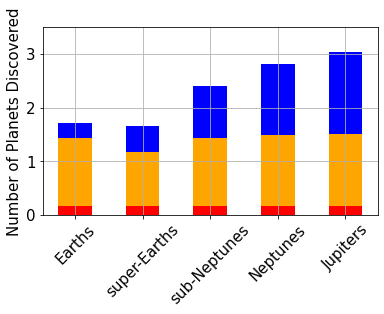

[0.43645 0.66051 1.12405 1.41794 1.57081]
[2.098416 1.47196  1.53289  1.5391   1.53927 ]
[0.21923 0.21791 0.21809 0.21691 0.21828]
14.481816


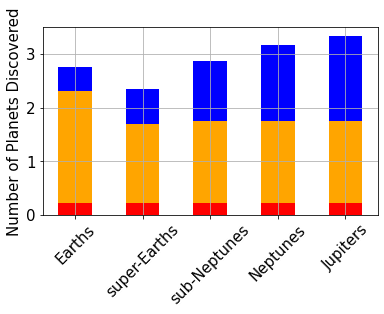

In [5]:
results = np.array(results)



coldStd = (0., 0., 0., 0., 0.)
warmStd = (0., 0., 0., 0., 0.)
hotStd  = (0., 0., 0., 0., 0.)

for i_res in range(2):
    cold = results[::3,i_res]
    warm = results[1::3,i_res]
    hot = results[2::3,i_res]
    print(cold)
    print(warm)
    print(hot)

    print(np.sum([np.sum(cold),np.sum(warm),np.sum(hot)]))

    # barchart with CBE throughput
    # this is for 4 visits to 10 targets.
    figure(figsize=(6,4.5))
    N = 5
    # Earth, Super-Earth, Sub-Neptune, Neptune, Jupiter
    x=0
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5       # the width of the bars: can also be len(x) sequence

    p3 = plt.bar(ind, hot, width, color='red', yerr=coldStd)
    p2 = plt.bar(ind, warm, width, color='orange', bottom=hot, yerr=warmStd)
    p1 = plt.bar(ind, cold,  width, color='blue', bottom=(warm+hot), yerr=hotStd)

    plt.ylabel('Number of Planets Discovered')
    #plt.title('Scores by group and gender')
    plt.xticks(ind, ('Earths', 'super-Earths', 'sub-Neptunes', 'Neptunes', 'Jupiters'), rotation=45)
    ylim(0.,4.2)
    y1, y2 = ylim()
    plt.yticks(np.arange(0, y2, 1.))
    #plt.legend((p1[0], p2[0], p3[0]), ('Cold', 'Warm', 'Hot'), loc=1)
    grid(True)
    subplots_adjust(bottom=0.3)
    ylim(0., 3.5)
    savefig("Planet_Yield_%d.pdf"%i_res)
    plt.show()


